In [139]:
import tensorflow as tf
import datasets
import experiments2 as experiments
import pickle
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [140]:
output_path = '/om/user/xboix/share/insideness2/'
run_opt = experiments.get_experiments(output_path)[1:]
len(run_opt)

8100

In [141]:
results_data = []
for opt in run_opt:
    data_point = {}
    data_point["C"] = opt.hyper.complex_crossing
    data_point["alpha"] =  opt.hyper.alpha
    data_point["init_factor"] = opt.hyper.init_factor
    data_point["learning_rate"] = opt.hyper.learning_rate
    data_point["batch_size"] = opt.hyper.batch_size
        
    data_point["dataset_complexity"] = opt.dataset.complexity
    data_point["dataset_strict_complexity"] = opt.dataset.complexity_strict
    
    if not os.path.isfile(opt.log_dir_base + opt.name + '/results/intra_dataset_accuracy.pkl'):
        data_point["results"] = "empty"
       
    else:
        with open(opt.log_dir_base + opt.name + '/results/intra_dataset_accuracy.pkl', 'rb') as f:
            data_point["results"] = pickle.load(f)
            
    results_data.append(copy.deepcopy(data_point))

results_data[2]

{'C': 5,
 'alpha': 0.1,
 'batch_size': 32,
 'dataset_complexity': 0,
 'dataset_strict_complexity': False,
 'init_factor': 1,
 'learning_rate': 0.01,
 'results': {'test': 0.0,
  'testloose': 0.9166002282392862,
  'train': 0.0,
  'trainloose': 0.9166312830020138,
  'val': 0.0,
  'valloose': 0.9165127147083212}}

In [142]:
max_val_acc = -np.ones([2, 5])
max_idx = np.zeros([2, 5])
missing = np.zeros([2, 5])

for point_idx, data_point in enumerate(results_data):

    point_complextity = data_point["dataset_complexity"]
    idx_strict = 1-int(data_point["dataset_strict_complexity"])
    
    #if (not ("val" in data_point["results"])):
    #    print(point_idx)
    
    if not (data_point["results"] == "empty") and ("val" in data_point["results"]): 
        
            if max_val_acc[idx_strict, point_complextity] < data_point["results"]["valloose"]:
                max_idx[idx_strict, point_complextity] = point_idx
                max_val_acc[idx_strict, point_complextity] = data_point["results"]["valloose"]
    
    else:
        missing[idx_strict, point_complextity] += 1
        
print(max_idx)

max_train = np.zeros([2, 5])
max_test = np.zeros([2, 5])
max_train_loose = np.zeros([2, 5])
max_test_loose = np.zeros([2, 5])

C = np.zeros([2, 5])
alpha =  np.zeros([2, 5])
init_factor = np.zeros([2, 5])
learning_rate = np.zeros([2, 5])
batch_size = np.zeros([2, 5])
for idx_strict, dataset_strict_complexity  in enumerate([True, False]):
    for dataset_complexity in range(5):
        max_train[idx_strict, dataset_complexity] = \
            results_data[int(max_idx[idx_strict,dataset_complexity])]["results"]["train"]
        max_test[idx_strict, dataset_complexity] = \
            results_data[int(max_idx[idx_strict,dataset_complexity])]["results"]["test"]
        max_train_loose[idx_strict, dataset_complexity] = \
            results_data[int(max_idx[idx_strict,dataset_complexity])]["results"]["trainloose"]
        max_test_loose[idx_strict, dataset_complexity] = \
            results_data[int(max_idx[idx_strict,dataset_complexity])]["results"]["testloose"]
        
        C[idx_strict, dataset_complexity] = \
            results_data[int(max_idx[idx_strict,dataset_complexity])]["C"]
        alpha[idx_strict, dataset_complexity] = \
            results_data[int(max_idx[idx_strict,dataset_complexity])]["alpha"]
        init_factor[idx_strict, dataset_complexity] = \
            results_data[int(max_idx[idx_strict,dataset_complexity])]["init_factor"]
        learning_rate[idx_strict, dataset_complexity] = \
            results_data[int(max_idx[idx_strict,dataset_complexity])]["learning_rate"]
        batch_size[idx_strict, dataset_complexity] = \
            results_data[int(max_idx[idx_strict,dataset_complexity])]["batch_size"]
        

[[ 975. 2720. 4269. 6446. 8047.]
 [ 327. 2397. 3644. 5647. 7088.]]


[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[74.29436282 75.29531299 75.34446428 75.06003707 74.60198802]
[74.44701207 75.08967823 75.38829019 75.17407598 74.69009039]
[73.98180619 74.51538507 74.58221481 74.69341374 74.84065066]
[73.94174236 74.43885816 74.68745239 74.87150849 74.92351976]
[0. 1. 1. 8. 1.]
[ 0.  0.  1.  0. 10.]


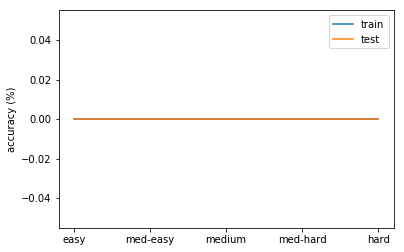

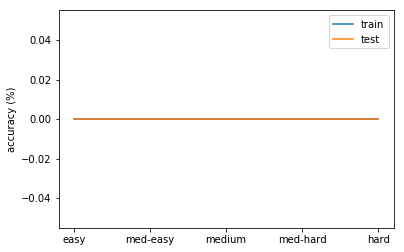

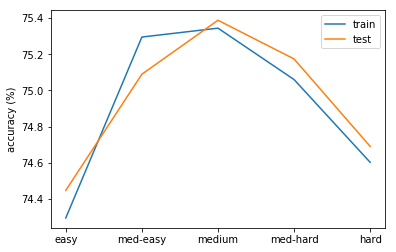

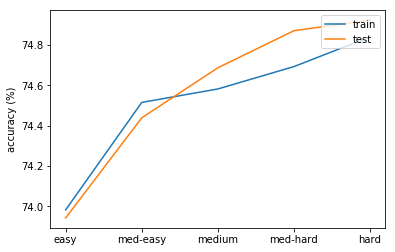

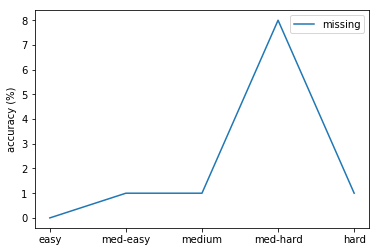

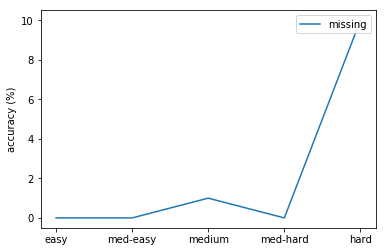

In [128]:
def plot_results_train_test(train, title, fig, name):

    x = np.linspace(1,5, 5)
    xlabels = ['easy','med-easy','medium','med-hard','hard' ]
    ytext ='accuracy (%)'

    plt.figure(fig)
    print(train)
    plt.plot(x, train, label=name)
    plt.ylabel(ytext)
    plt.xticks(x, xlabels)
    leg = plt.legend(loc='upper right', ncol=1,  fancybox=True)

plot_results_train_test(100*max_train[0,:], "Exclusive Complexity", 1, 'train')
plot_results_train_test(100*max_test[0,:], "Exclusive Complexity", 1, 'test')

plot_results_train_test(100*max_train[1,:], "Mixed Complexity", 2, 'train')
plot_results_train_test(100*max_test[1,:], "Mixed Complexity", 2, 'test')

plot_results_train_test(100*max_train_loose[0,:], "Loose Acc - Exclusive Complexity", 3, 'train')
plot_results_train_test(100*max_test_loose[0,:], "Loose Acc - Exclusive Complexity", 3, 'test')

plot_results_train_test(100*max_train_loose[1,:], "Loose Acc - Mixed Complexity", 4, 'train')
plot_results_train_test(100*max_test_loose[1,:], "Loose Acc - Mixed Complexity", 4, 'test')    

plot_results_train_test(missing[0,:], "Exclusive Complexity", 5, 'missing')
plot_results_train_test(missing[1,:], "Mixed Complexity", 6, 'missing')


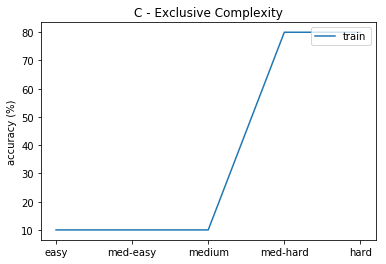

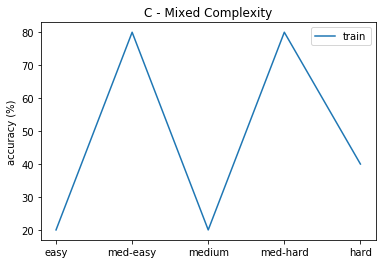

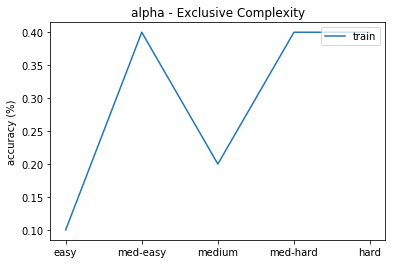

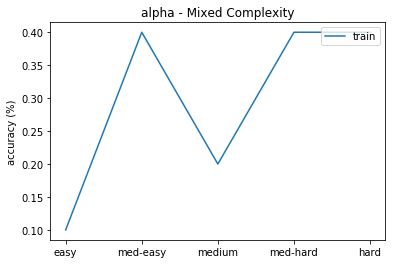

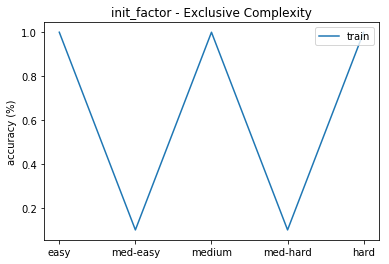

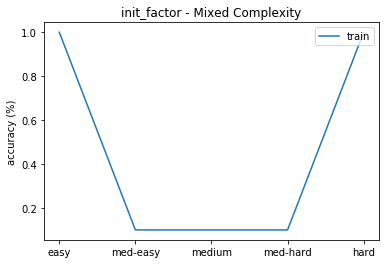

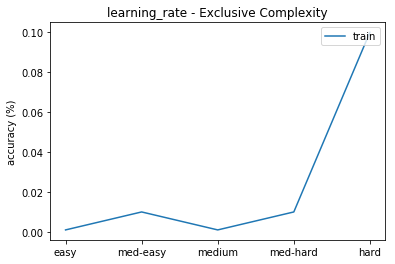

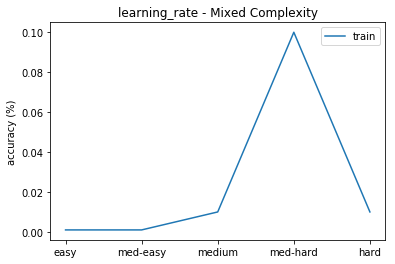

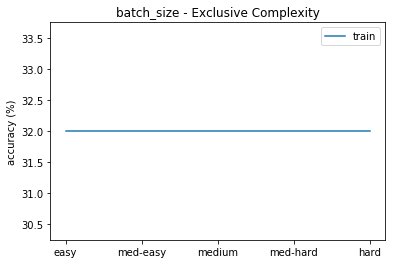

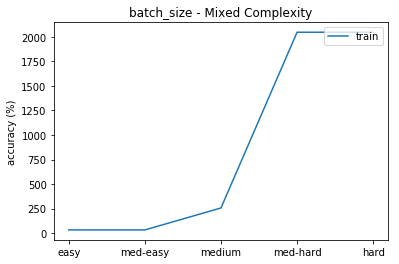

In [105]:
def plot_results(data, title, fig):

    x = np.linspace(1,5, 5)
    xlabels = ['easy','med-easy','medium','med-hard','hard' ]
    ytext ='accuracy (%)'

    plt.figure(fig)
    plt.plot(x, data, label="train")
    plt.title(title)
    plt.ylabel(ytext)
    plt.xticks(x, xlabels)
    leg = plt.legend(loc='upper right', ncol=1,  fancybox=True)

plot_results(C[0,:], "C - Exclusive Complexity", 1)
plot_results(C[1,:], "C - Mixed Complexity", 2)
plot_results(alpha[0,:], "alpha - Exclusive Complexity", 3)
plot_results(alpha[1,:], "alpha - Mixed Complexity", 4)    
plot_results(init_factor[0,:], "init_factor - Exclusive Complexity", 5)
plot_results(init_factor[1,:], "init_factor - Mixed Complexity", 6)   
plot_results(learning_rate[0,:], "learning_rate - Exclusive Complexity", 7)
plot_results(learning_rate[1,:], "learning_rate - Mixed Complexity", 8)  
plot_results(batch_size[0,:], "batch_size - Exclusive Complexity", 9)
plot_results(batch_size[1,:], "batch_size - Mixed Complexity", 10)  

[0. 0. 0. 0. 0.]
[63.39924246 64.43383199 64.73804933 64.81381421 64.80903057]
[0. 0. 0. 0. 0.]
[69.25228327 70.56651204 70.93698146 71.026848   71.00598719]
[0. 0. 0. 0. 0.]
[71.87171951 73.15813962 73.50662541 73.55631775 73.46211298]
[0. 0. 0. 0. 0.]
[73.51313794 74.70604942 74.94838048 74.85646229 74.58885708]
[0. 0. 0. 0. 0.]
[74.29436282 75.29531299 75.34446428 75.06003707 74.60198802]


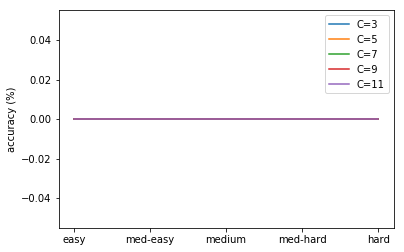

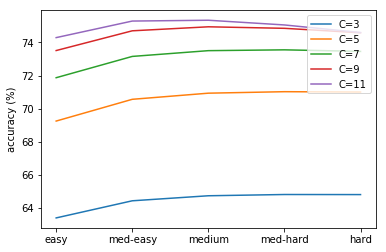

In [131]:

missing = np.zeros([2, 5])

C = [3,5,7,9,11]#[5, 10, 20, 40, 80]#
alpha = [0.1, 0.2, 0.4, 0.6]
init_factor = [1, 1e-1, 1e1]
batch_size = [32, 256, 2048]
learning_rate = [1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]

for c in C:
    max_val_acc = np.zeros([2, 5])
    max_idx = -np.ones([2, 5])
    for point_idx, data_point in enumerate(results_data):

        point_complextity = data_point["dataset_complexity"]
        idx_strict = 1-int(data_point["dataset_strict_complexity"])

        #if (not ("val" in data_point["results"])):
        #    print(point_idx)

        if (data_point["C"] == c) and not (data_point["results"] == "empty") and ("val" in data_point["results"]): 

                if max_val_acc[idx_strict, point_complextity] < data_point["results"]["valloose"]:
                    max_idx[idx_strict, point_complextity] = point_idx
                    max_val_acc[idx_strict, point_complextity] = data_point["results"]["valloose"]

        else:
            missing[idx_strict, point_complextity] += 1

    max_train = np.zeros([2, 5])
    max_test = np.zeros([2, 5])
    max_train_loose = np.zeros([2, 5])
    max_test_loose = np.zeros([2, 5])
    for idx_strict, dataset_strict_complexity  in enumerate([True, False]):
        for dataset_complexity in range(5):
            max_train[idx_strict, dataset_complexity] = \
                results_data[int(max_idx[idx_strict,dataset_complexity])]["results"]["train"]
            max_test[idx_strict, dataset_complexity] = \
                results_data[int(max_idx[idx_strict,dataset_complexity])]["results"]["test"]
            max_train_loose[idx_strict, dataset_complexity] = \
                results_data[int(max_idx[idx_strict,dataset_complexity])]["results"]["trainloose"]
            max_test_loose[idx_strict, dataset_complexity] = \
                results_data[int(max_idx[idx_strict,dataset_complexity])]["results"]["testloose"]
            
    plot_results_train_test(100*max_train[0,:], "Exclusive Complexity", 1, "C="+str(c))
    #plot_results_train_test(100*max_train[1,:], "Mixed Complexity", 2, "C="+str(c))
    plot_results_train_test(100*max_train_loose[0,:], "Loose Acc - Exclusive Complexity", 3, "C="+str(c))
    #plot_results_train_test(100*max_train_loose[1,:], "Loose Acc - Mixed Complexity", 4, "C="+str(c))    

In [132]:
output_path = '/om/user/xboix/share/insideness3/'
run_opt = experiments.get_best_of_the_family(output_path)
opt_data = datasets.get_datasets(output_path)

In [133]:
results_data_generalization = []
for opt in run_opt:
    data_point = {}
    data_point["C"] = opt.hyper.complex_crossing
    data_point["alpha"] =  opt.hyper.alpha
    data_point["init_factor"] = opt.hyper.init_factor
    data_point["learning_rate"] = opt.hyper.learning_rate
    data_point["batch_size"] = opt.hyper.batch_size
        
    data_point["dataset_complexity"] = opt.dataset.complexity
    data_point["dataset_strict_complexity"] = opt.dataset.complexity_strict
    
    if not os.path.isfile(opt.log_dir_base + opt.name + '/results/generalization_accuracy.pkl'):
        data_point["results"] = "empty"
       
    else:
        with open(opt.log_dir_base + opt.name + '/results/generalization_accuracy.pkl', 'rb') as f:
            data_point["results"] = pickle.load(f)
            
    results_data_generalization.append(copy.deepcopy(data_point))
    
datasets_idx = np.zeros([2,5])
for idx, opt in enumerate(opt_data):
    if not opt.num_images_training == 1e5:
        continue
    if opt.complexity_strict:
        datasets_idx[0,opt.complexity] = idx
    else:
        datasets_idx[1,opt.complexity] = idx

results_data_generalization

[{'C': 11,
  'alpha': 0.6,
  'batch_size': 2048,
  'dataset_complexity': 0,
  'dataset_strict_complexity': False,
  'init_factor': 1,
  'learning_rate': 0.01,
  'results': {'test_accuracy': {0: 0.0,
    1: 0.0,
    2: 0.0,
    3: 0.0,
    4: 0.0,
    5: 0.0,
    6: 0.0,
    7: 0.0,
    8: 0.0,
    9: 0.0,
    10: 0.0,
    11: 0.0,
    12: 0.0,
    13: 0.0,
    14: 0.0,
    15: 0.0,
    16: 0.0,
    17: 0.0,
    18: 0.0,
    19: 0.0,
    20: 0.0,
    21: 0.0,
    22: 0.0,
    23: 0.0,
    24: 0.0,
    25: 0.0,
    26: 0.0,
    27: 0.0,
    28: 0.0,
    29: 0.0,
    30: 0.0,
    31: 0.0,
    32: 0.0,
    33: 0.0,
    34: 0.0,
    35: 0.0,
    36: 0.0,
    37: 0.0,
    38: 0.0,
    39: 0.0,
    40: 0.0,
    41: 0.0,
    42: 0.0,
    43: 0.0,
    44: 0.0,
    45: 0.0,
    46: 0.0,
    47: 0.0,
    48: 0.0,
    49: 0.0},
   'test_accuracy_loose': {0: 0.7401602197647095,
    1: 0.7455874782562256,
    2: 0.7440624271392823,
    3: 0.7561993646621704,
    4: 0.7490930977821351,
    5: 0.75138

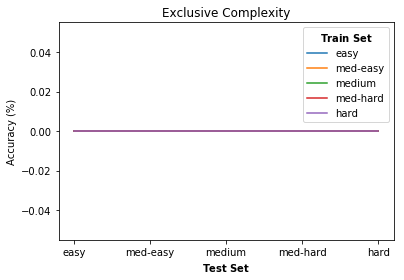

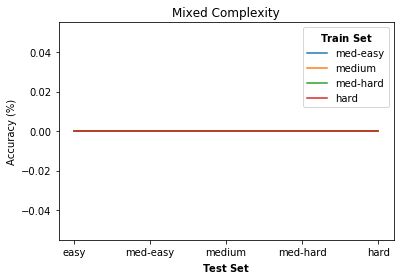

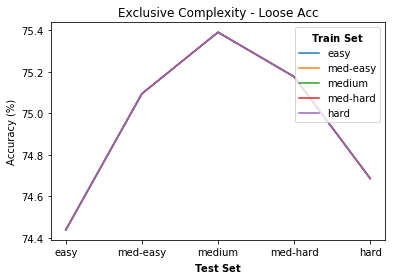

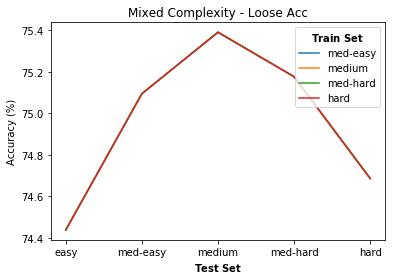

In [134]:
dataset_labels = ['easy','med-easy','medium','med-hard','hard' ]
#fontbf = FontProperties()
#fontbf.set_weight('bold')

def plot_results_generalization(train, title, fig, name):
    x = np.linspace(1,5, 5)
    xlabels = dataset_labels
    ytext = r'Accuracy (%)'
    xtext = r'$\bf Test$ $\bf Set$'
    
    plt.figure(fig)
    #print(train)
    plt.plot(x, train, label=name)
    plt.title(title)
    plt.ylabel(ytext)
    plt.xticks(x, xlabels)
    plt.xlabel(xtext)
    leg = plt.legend(loc='upper right', ncol=1,  title=r'$\bf Train$ $\bf Set$', fancybox=True)

for res in results_data_generalization[1:]:
    
    #Collect all generalization results for one network
    test = np.zeros([2, 5])
    test_loose = np.zeros([2, 5])
    for idx_strict, dataset_strict_complexity  in enumerate([True, False]):
        for dataset_complexity in range(5):
            test[idx_strict, dataset_complexity] = \
                res["results"]["test_accuracy"][int(datasets_idx[idx_strict,dataset_complexity])]
            test_loose[idx_strict, dataset_complexity] = \
                res["results"]["test_accuracy_loose"][int(datasets_idx[idx_strict,dataset_complexity])]
            
    if res['dataset_strict_complexity']:
        plot_results_generalization(100*test[0,:], "Exclusive Complexity", 0, dataset_labels[res['dataset_complexity']])
        plot_results_generalization(100*test_loose[0,:], "Exclusive Complexity - Loose Acc", 2, dataset_labels[res['dataset_complexity']])
    else:
        plot_results_generalization(100*test[0,:], "Mixed Complexity", 1, dataset_labels[res['dataset_complexity']])
        plot_results_generalization(100*test_loose[0,:], "Mixed Complexity - Loose Acc", 3, dataset_labels[res['dataset_complexity']])
        
        

In [138]:
output_path = '/om/user/xboix/share/insideness3/'
run_opt = experiments2.get_experiments_selected(output_path)

KeyError: 'ID'

In [ ]:
results_data_initial_conditions = []
for opt in run_opt:
    data_point = {}
    data_point["C"] = opt.hyper.complex_crossing
    data_point["alpha"] =  opt.hyper.alpha
    data_point["init_factor"] = opt.hyper.init_factor
    data_point["learning_rate"] = opt.hyper.learning_rate
    data_point["batch_size"] = opt.hyper.batch_size
        
    data_point["dataset_complexity"] = opt.dataset.complexity
    data_point["dataset_strict_complexity"] = opt.dataset.complexity_strict

    if not os.path.isfile(opt.log_dir_base + opt.name + '/results/intra_dataset_accuracy.pkl'):
        data_point["results"] = "empty"
       
    else:
        with open(opt.log_dir_base + opt.name + '/results/intra_dataset_accuracy.pkl', 'rb') as f:
            data_point["results"] = pickle.load(f)
            
    results_data_initial_conditions.append(copy.deepcopy(data_point))

In [ ]:
NUM_SAMPLES = 100

def plot_distribution(data, fig, title):
    plt.figure(fig)
    plt.axis([0, 100, 0, 100])
    plt.title(title)
    plt.hist(data, bins=np.arange(0, 100 + 5, 5), density=False, facecolor='g', alpha=0.75)

fig_num = 0
for idx_strict, dataset_strict_complexity in enumerate([True, False]):
    for dataset_complexity in range(5):
        acc = np.zeros([2, NUM_SAMPLES])
        k = 0
        for res in results_data_initial_conditions:
                
                if (res["dataset_complexity"] == dataset_complexity) and (res["dataset_strict_complexity"] == dataset_strict_complexity):
                    if not res["results"] == "empty":
                        acc[0, k] = res["results"]["test"]
                        acc[1, k] = res["results"]["testloose"]
                        k+=1
                    
        plot_distribution(100*acc[0,:], fig_num, str(dataset_complexity))
        fig_num += 1
        plot_distribution(100*acc[1,:], fig_num, str(dataset_complexity))
        fig_num += 1
                    

In [ ]:
import experiments2
opt_run = experiments2.get_best_of_the_family(output_path)

results_data_perturbation = []
for opt in opt_run:
    data_point = {}
    data_point["C"] = opt.hyper.complex_crossing
    data_point["alpha"] =  opt.hyper.alpha
    data_point["init_factor"] = opt.hyper.init_factor
    data_point["learning_rate"] = opt.hyper.learning_rate
    data_point["batch_size"] = opt.hyper.batch_size
        
    data_point["dataset_complexity"] = opt.dataset.complexity
    data_point["dataset_strict_complexity"] = opt.dataset.complexity_strict
    
    if not os.path.isfile(opt.log_dir_base + opt.name + '/results/intra_dataset_perturbation.pkl'):
        data_point["results"] = "empty"
       
    else:
        with open(opt.log_dir_base + opt.name + '/results/intra_dataset_perturbation.pkl', 'rb') as f:
            data_point["results"] = pickle.load(f)
            
    results_data_perturbation.append(copy.deepcopy(data_point))

print(results_data_perturbation[0]['results'][9])


datasets_idx = np.zeros([2,5])
for idx, opt in enumerate(opt_data[40:50]):
    if opt.complexity_strict:
        datasets_idx[0,opt.complexity] = idx
    else:
        datasets_idx[1,opt.complexity] = idx

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


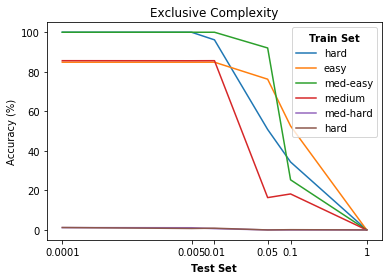

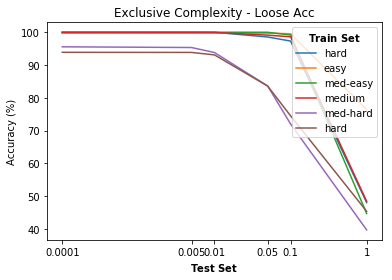

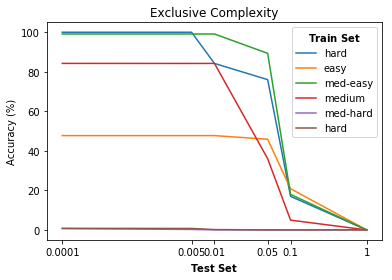

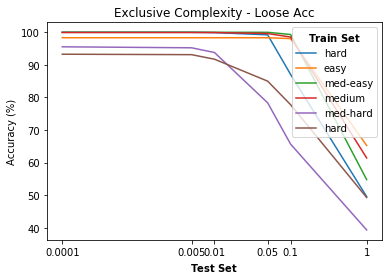

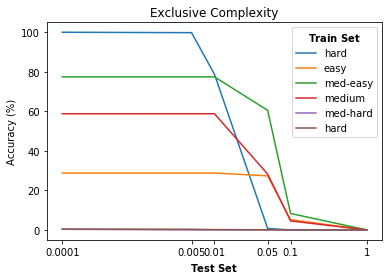

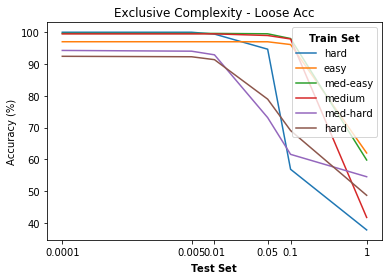

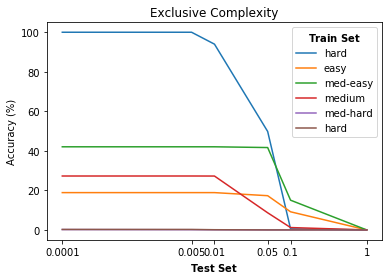

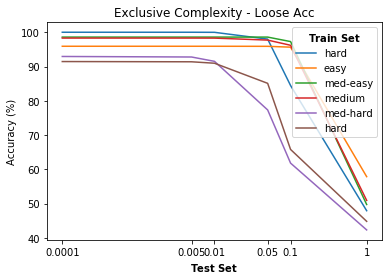

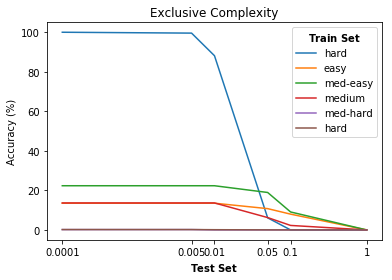

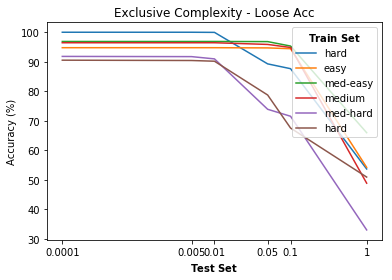

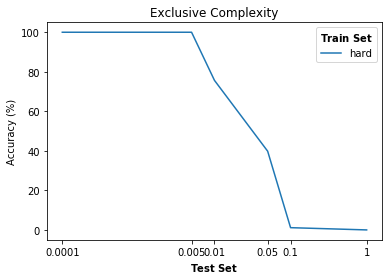

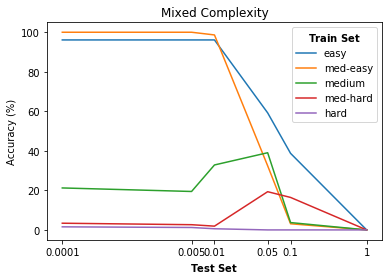

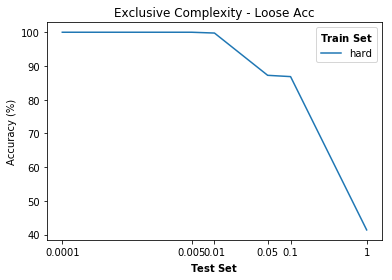

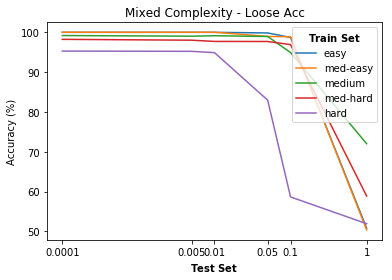

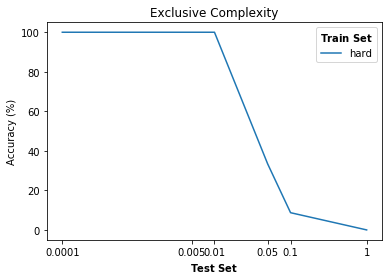

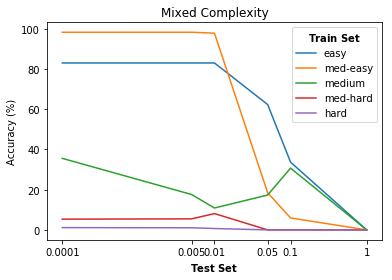

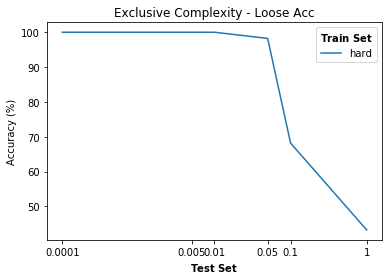

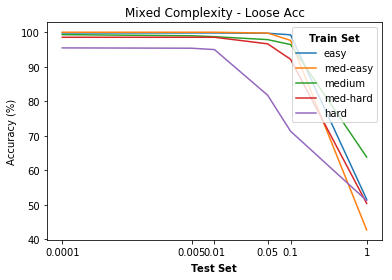

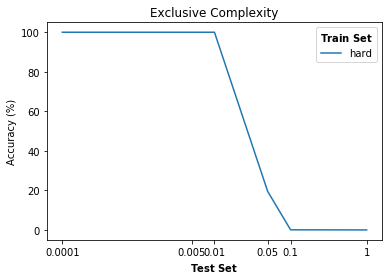

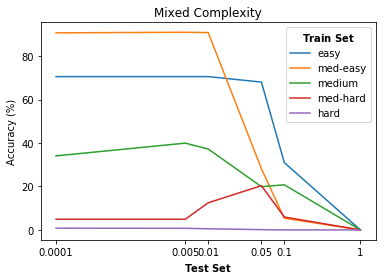

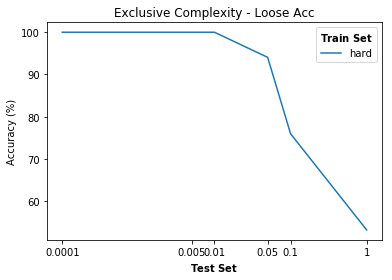

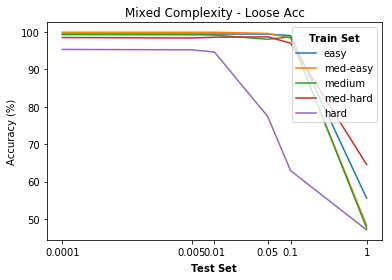

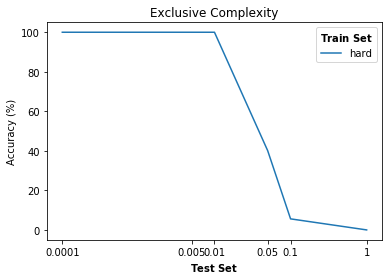

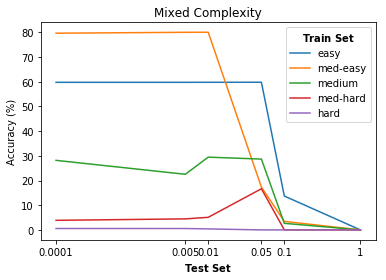

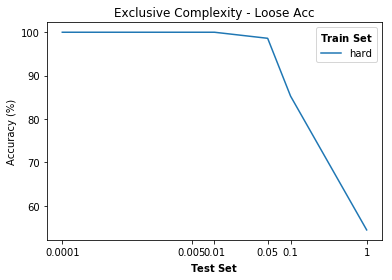

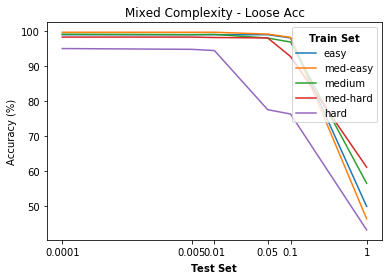

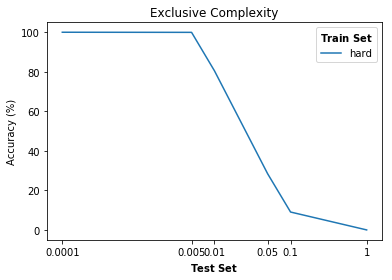

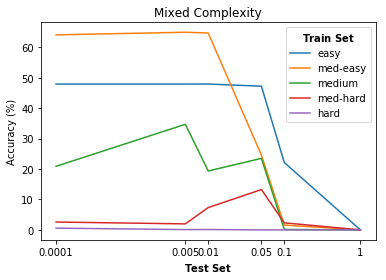

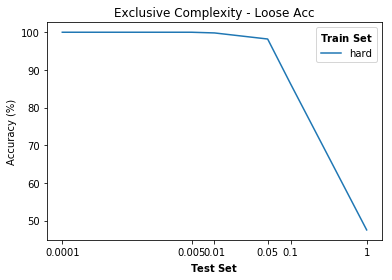

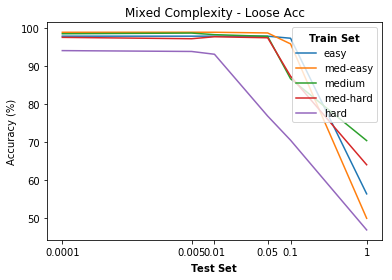

In [68]:
dataset_labels = ['easy','med-easy','medium','med-hard','hard' ]
NUM_TRIALS = 5
DELTAS = [1e-4, 5e-3, 1e-2, 5e-2, 1e-1, 1]

def plot_results_perturbation(train, title, fig, name):
    x = np.log(DELTAS)
    xlabels = DELTAS
    ytext = r'Accuracy (%)'
    xtext = r'$\bf Test$ $\bf Set$'
    
    plt.figure(fig)
    #print(train)
    plt.plot(x, train, label=name)
    plt.title(title)
    plt.ylabel(ytext)
    plt.xticks(x, xlabels)
    plt.xlabel(xtext)
    leg = plt.legend(loc='upper right', ncol=1,  title=r'$\bf Train$ $\bf Set$', fancybox=True)

idx_plot = 0
for idx_strict, dataset_strict_complexity  in enumerate([True, False]):
    for dataset_complexity in range(5):
        
        for idx_res, res in enumerate(results_data_perturbation):
            
            if (res['dataset_strict_complexity'] != dataset_strict_complexity) and idx_res!=0:
                continue
                
            test = np.zeros([len(DELTAS)])
            test_loose = np.zeros([len(DELTAS)])
            
            test[:] = \
                np.average(res["results"][int(datasets_idx[idx_strict,dataset_complexity])]["strict"], axis=1)
            
            test_loose[:] = \
                np.average(res["results"][int(datasets_idx[idx_strict,dataset_complexity])]["loose"], axis=1)
            
            if res['dataset_strict_complexity']:
                plot_results_perturbation(100*test, "Exclusive Complexity", 0+4*idx_plot, dataset_labels[res['dataset_complexity']])
                plot_results_perturbation(100*test_loose, "Exclusive Complexity - Loose Acc", 2+4*idx_plot, dataset_labels[res['dataset_complexity']])
            else:
                plot_results_perturbation(100*test, "Mixed Complexity", 1+4*idx_plot, dataset_labels[res['dataset_complexity']])
                plot_results_perturbation(100*test_loose, "Mixed Complexity - Loose Acc", 3+4*idx_plot, dataset_labels[res['dataset_complexity']])
        
        idx_plot += 1
        

In [63]:
results_data_perturbation[0]

{'C': 20,
 'alpha': 0.1,
 'batch_size': 128,
 'dataset_complexity': 4,
 'dataset_strict_complexity': True,
 'init_factor': 1,
 'learning_rate': 0.01,
 'results': {0: {'loose': array([[1.        , 1.        , 1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        , 1.        , 1.        ],
          [1.        , 1.        , 0.99043072, 0.99766179, 1.        ],
          [0.99999498, 0.53034769, 0.91945621, 1.        , 0.91134811],
          [0.94625237, 0.92482321, 0.99217378, 0.5       , 0.97881571],
          [0.15572808, 0.5       , 0.50019755, 0.49961146, 0.41288794]]),
   'strict': array([[1.    , 1.    , 1.    , 1.    , 1.    ],
          [1.    , 1.    , 1.    , 1.    , 1.    ],
          [1.    , 1.    , 0.2112, 0.5712, 1.    ],
          [0.991 , 0.    , 0.    , 1.    , 0.    ],
          [0.    , 0.    , 0.002 , 0.    , 0.0549],
          [0.    , 0.    , 0.    , 0.    , 0.    ]])},
  1: {'loose': array([[1.        , 1.        , 1.        , 1.       